In [2]:
from pathlib import Path
import pandas as pd
import json
import matplotlib.pyplot as plt

# Create the dataframe

In [3]:
data_path = Path('/Users/roberttk/gh_loc/data/repo_loc_info_230423.json')
with open(data_path, 'r') as f:
    data = json.load(f)

lang_set = set()
for repo in data.values():
    for lang in repo:
        if not isinstance(lang, dict):
            continue
        lang_set.add(lang['language'])

lang_detail_columns = set(lang.keys())
lang_detail_columns.remove('language')

index = pd.MultiIndex.from_product([lang_set, lang_detail_columns],names=['language', 'info'])
df = pd.DataFrame(index=index, columns=data.keys())

# fill out information
for reponame, info in data.items():
    for data_dict in info:
        if isinstance(data_dict, str):
            continue
        for data_key, value in data_dict.items():
            if data_key == 'language':
                continue

            df.loc[(data_dict['language'], data_key), reponame] = value

In [4]:
df.head()

all-deployed-iocs epics-config lcls-twincat-motion atef   
language info                                                                  
Markdown files                     NaN          NaN                   4    2  \
         linesOfCode               NaN          NaN                 144   37   
         blanks                    NaN          NaN                  25    9   
         comments                  NaN          NaN                   0    0   
         lines                     NaN          NaN                 169   46   

                     nabs tc-release lucid pcdsdevices lightpath pytmc  ...   
language info                                                           ...   
Markdown files          4          1     2           4         3   NaN  ...  \
         linesOfCode   87         29    36         152        71   NaN  ...   
         blanks        17         10     5          45        14   NaN  ...   
         comments       0          0     0           0         0   NaN  ...   
         lines        104         39    41         197        85   NaN  ...   

                     sxr TcStaticAnalysisLoader pymps sim_beamline SDS_test   
language info                                                                 
Markdown files         2                      1     2            1        1  \
         linesOfCode  36                     22    66           15       19   
         blanks        5                      5    10           10       14   
         comments      0                      0     0            0        0   
         lines        41                     27    76           25       33   

                     time_zero QDarkStyleSheet skywalker-docs   
language info                                                   
Markdown files               2               8              1  \
         linesOfCode        36             667             34   
         blanks              5             267              5   
         comments            0               0              0   
         lines              41             934             39   

                     SebastianSlackBot mfxRobotVal3  
language info                                        
Markdown files                       2          NaN  
         linesOfCode                55          NaN  
         blanks                     27          NaN  
         comments                    0          NaN  
         lines                      82          NaN  

[5 rows x 293 columns]

# Example Queries

In [5]:
#: to get a repo's information
print(df['pcdsdevices'].dropna().to_string())

language          info       
Markdown          files              4
                  linesOfCode      152
                  blanks            45
                  comments           0
                  lines            197
Autoconf          files              1
                  linesOfCode        9
                  blanks             0
                  comments           0
                  lines              9
YAML              files              5
                  linesOfCode      106
                  blanks            11
                  comments          10
                  lines            127
gitignore         files              1
                  linesOfCode       13
                  blanks             4
                  comments           3
                  lines             20
BASH              files              1
                  linesOfCode        5
                  blanks             3
                  comments           2
                  lines           

/var/folders/91/rlnvp0jx0k38f1bb_srbk_fn472fqf/T/ipykernel_29989/572497373.py:5: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  sum_df.drop(labels='Total', inplace=True)
/var/folders/91/rlnvp0jx0k38f1bb_srbk_fn472fqf/T/ipykernel_29989/572497373.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


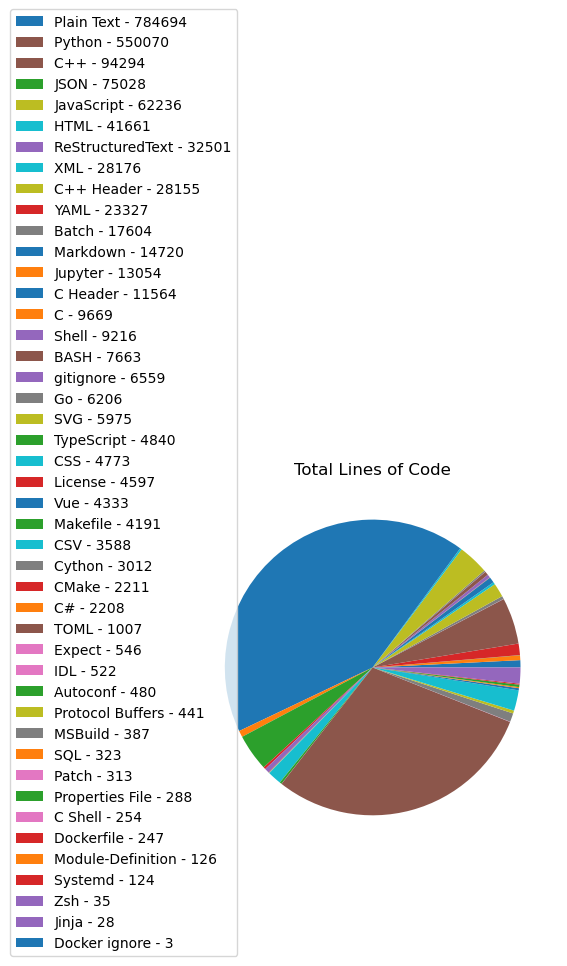

In [6]:
#: flatten on reponame
# Sum across columns
sum_df = df.sum(axis=1, skipna=True)
# drop total
sum_df.drop(labels='Total', inplace=True)

# Plot as piechart
fig, ax = plt.subplots()
lang_names = sum_df.index.get_level_values('language').unique()
values = sum_df.loc[(slice(None), "linesOfCode")] 
labels = [f'{name} - {sum_df.loc[(name, "linesOfCode")]}' for name in lang_names]
patches, texts = ax.pie(sum_df.loc[(slice(None),'linesOfCode')])
patches, labels, dummy =  zip(*sorted(zip(patches, labels, values),
                                        key=lambda x: x[2],
                                        reverse=True))

ax.set_title('Total Lines of Code')
ax.legend(patches, labels, loc='center left', bbox_to_anchor=(-.5, 1.))
fig.show()

In [15]:
# pick a language and sort repos highest to lowest
lang = 'Python'
print(f'Top 20 {lang} repos by lines of code')
df.loc[lang, 'linesOfCode'].dropna().sort_values(ascending=False).head(20)

lcls2                    127337
mec                       43824
pcdsdevices               35966
QDarkStyleSheet           19048
whatrecord                18633
atef                      16174
xpp                       15350
typhos                    11998
pytmc                     10211
xcs                       10166
pswalker                   8722
rix                        8698
hxrsnd                     8200
pcdsdaq                    7729
ophyd-ads                  7643
jet_tracking               7122
happi                      6952
ads-async                  6867
las-dispersion-scan        6492
AT1K0-GATT-TRANS-CALC      6093
Name: (Python, linesOfCode), dtype: object